🎯 Key Features:
1. Simple Pendulum Analysis

Different initial amplitudes and damping effects
Phase portraits and energy conservation
Small angle vs. large angle behavior

2. Driven Pendulum & Resonance

Resonance curves showing frequency response
Chaotic motion and strange attractors
Poincaré sections for chaos analysis

3. Double Pendulum System

Chaotic motion and sensitivity to initial conditions
Energy conservation analysis
Cartesian trajectory visualization

4. Advanced Analysis

Bifurcation diagrams
Lyapunov exponents (chaos indicators)
Frequency spectrum analysis
Strange attractors in phase space

🚀 Interactive Features:

Real-time animations with trajectory trails
Interactive sliders for parameter exploration
Phase space visualizations
Energy analysis plots

📊 What You'll See:

Simple Pendulum: Position vs time, phase portraits, energy plots
Driven Pendulum: Resonance curves, chaotic behavior, frequency response
Double Pendulum: Chaotic trajectories, sensitivity analysis, normal modes
Chaos Analysis: Bifurcation diagrams, strange attractors, Lyapunov exponents

🔬 Scientific Insights:

Linear vs Nonlinear: Compare small-angle approximation with full nonlinear dynamics
Chaos: See how tiny changes in initial conditions lead to vastly different outcomes
Resonance: Understand how driving frequency affects response amplitude
Energy: Track kinetic, potential, and total energy conservation

Pendulum Motion Visualization Demo

1. Simple Pendulum Analysis...


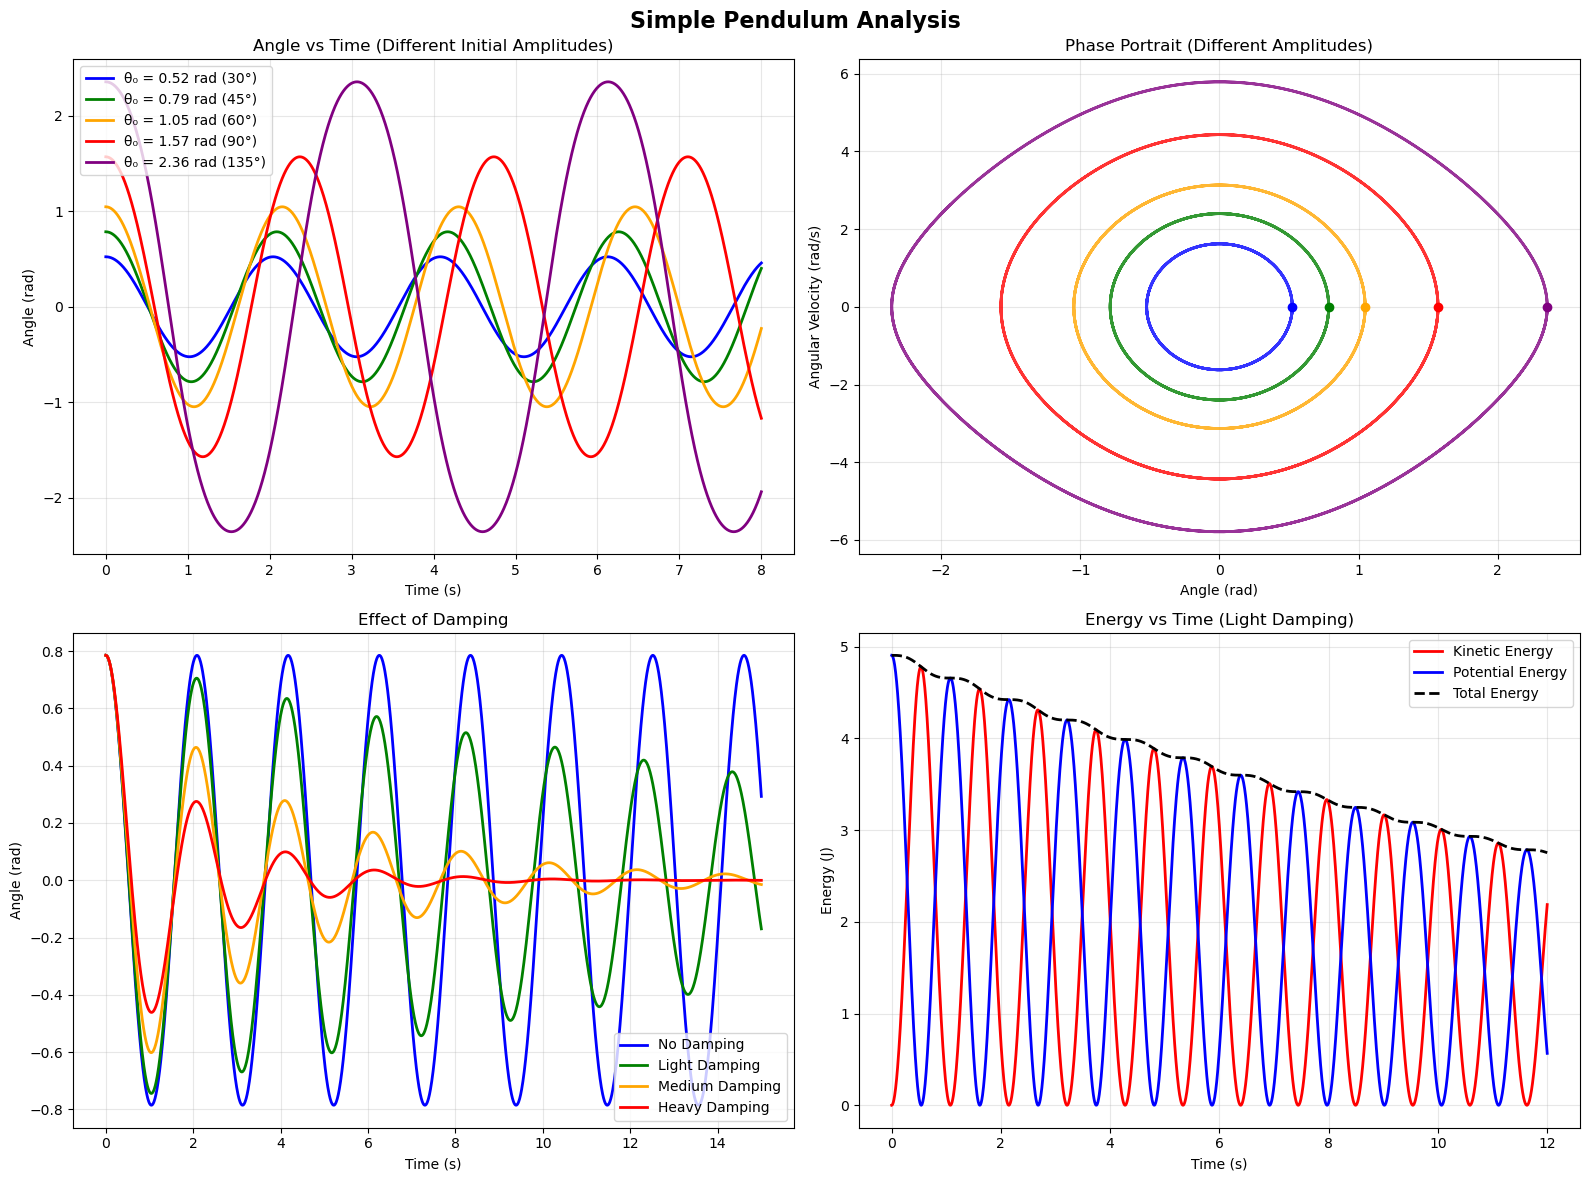


2. Driven Pendulum Analysis...


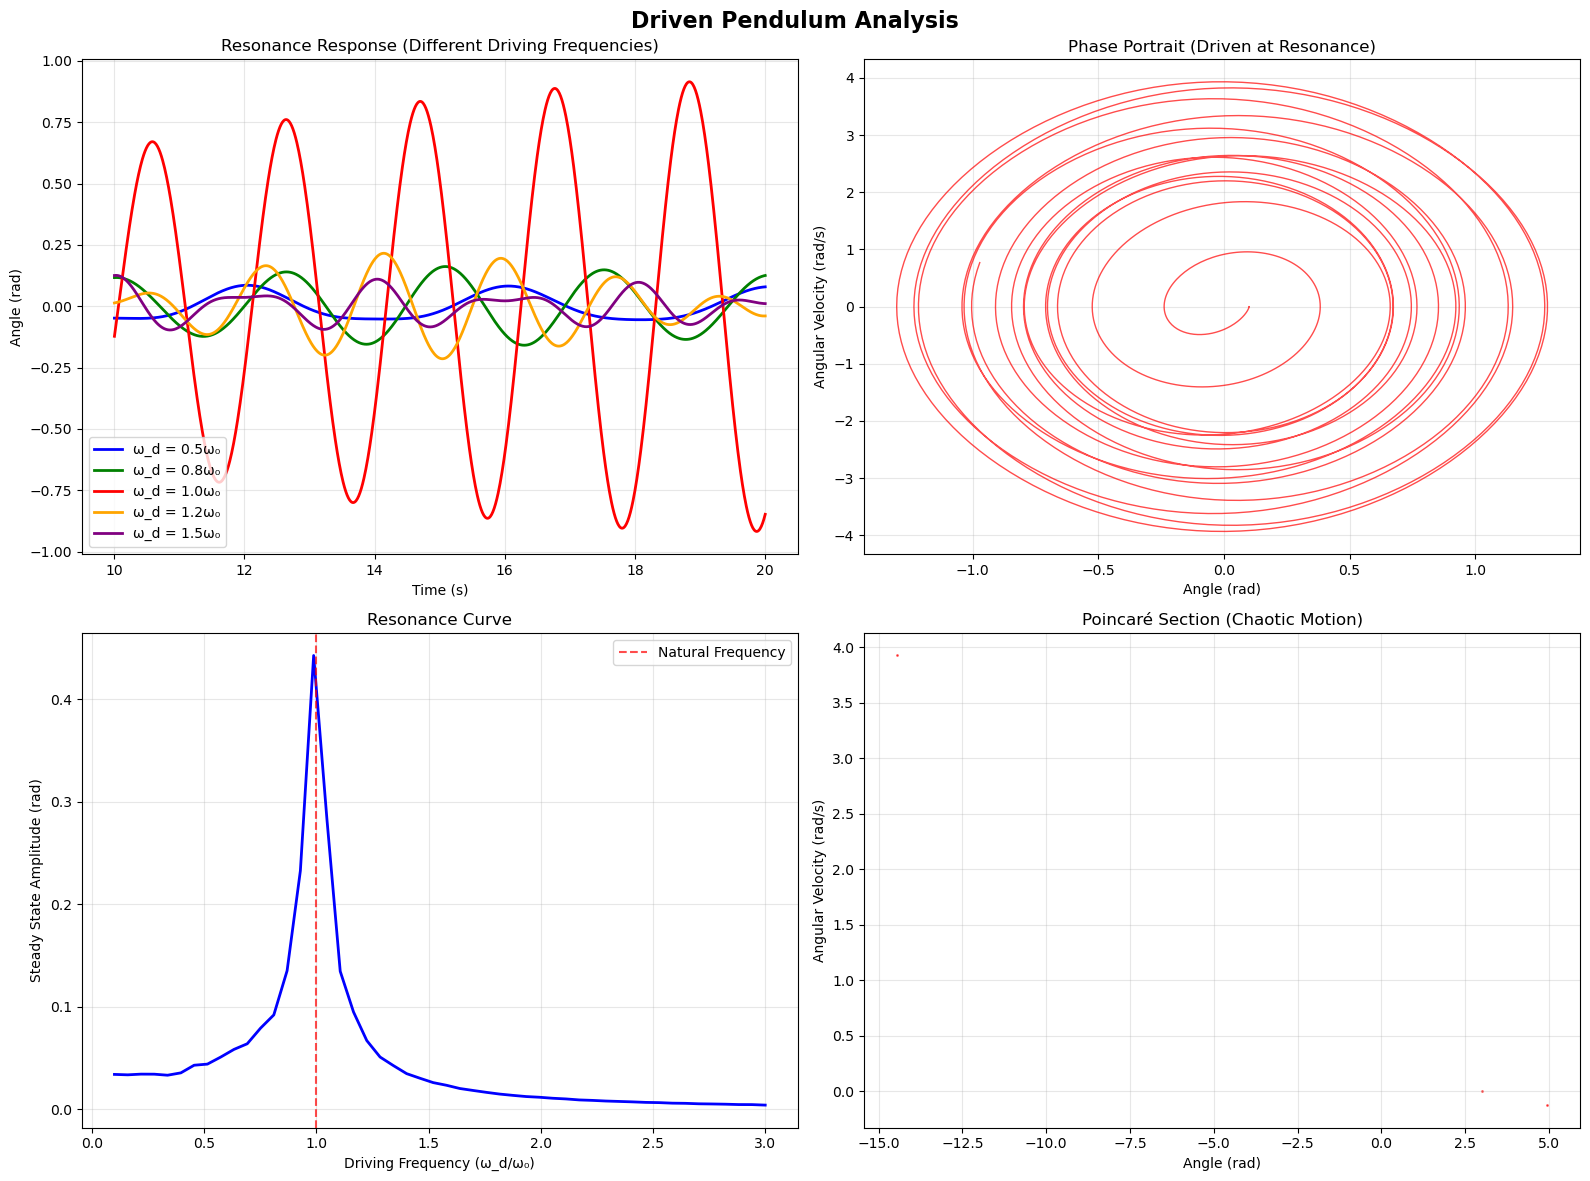


3. Creating Animated Simple Pendulum...


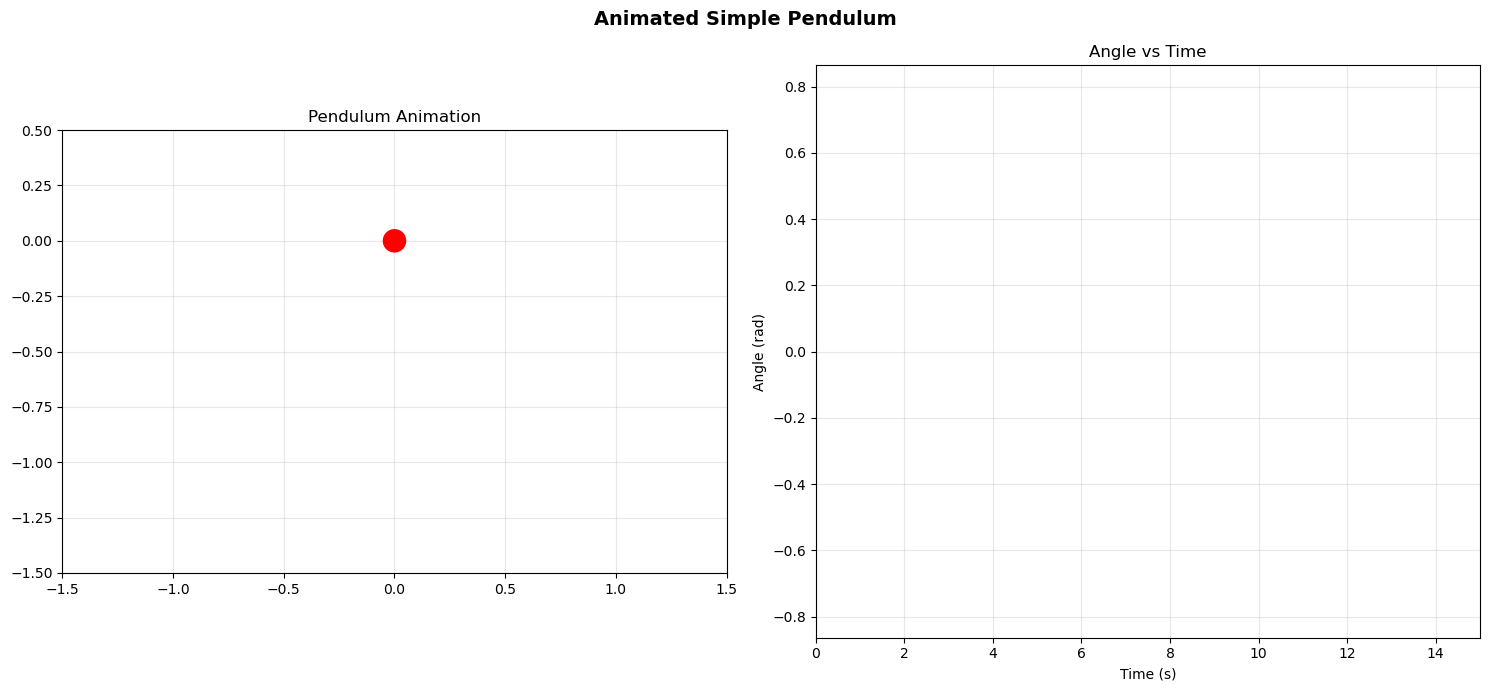


4. Double Pendulum Analysis...


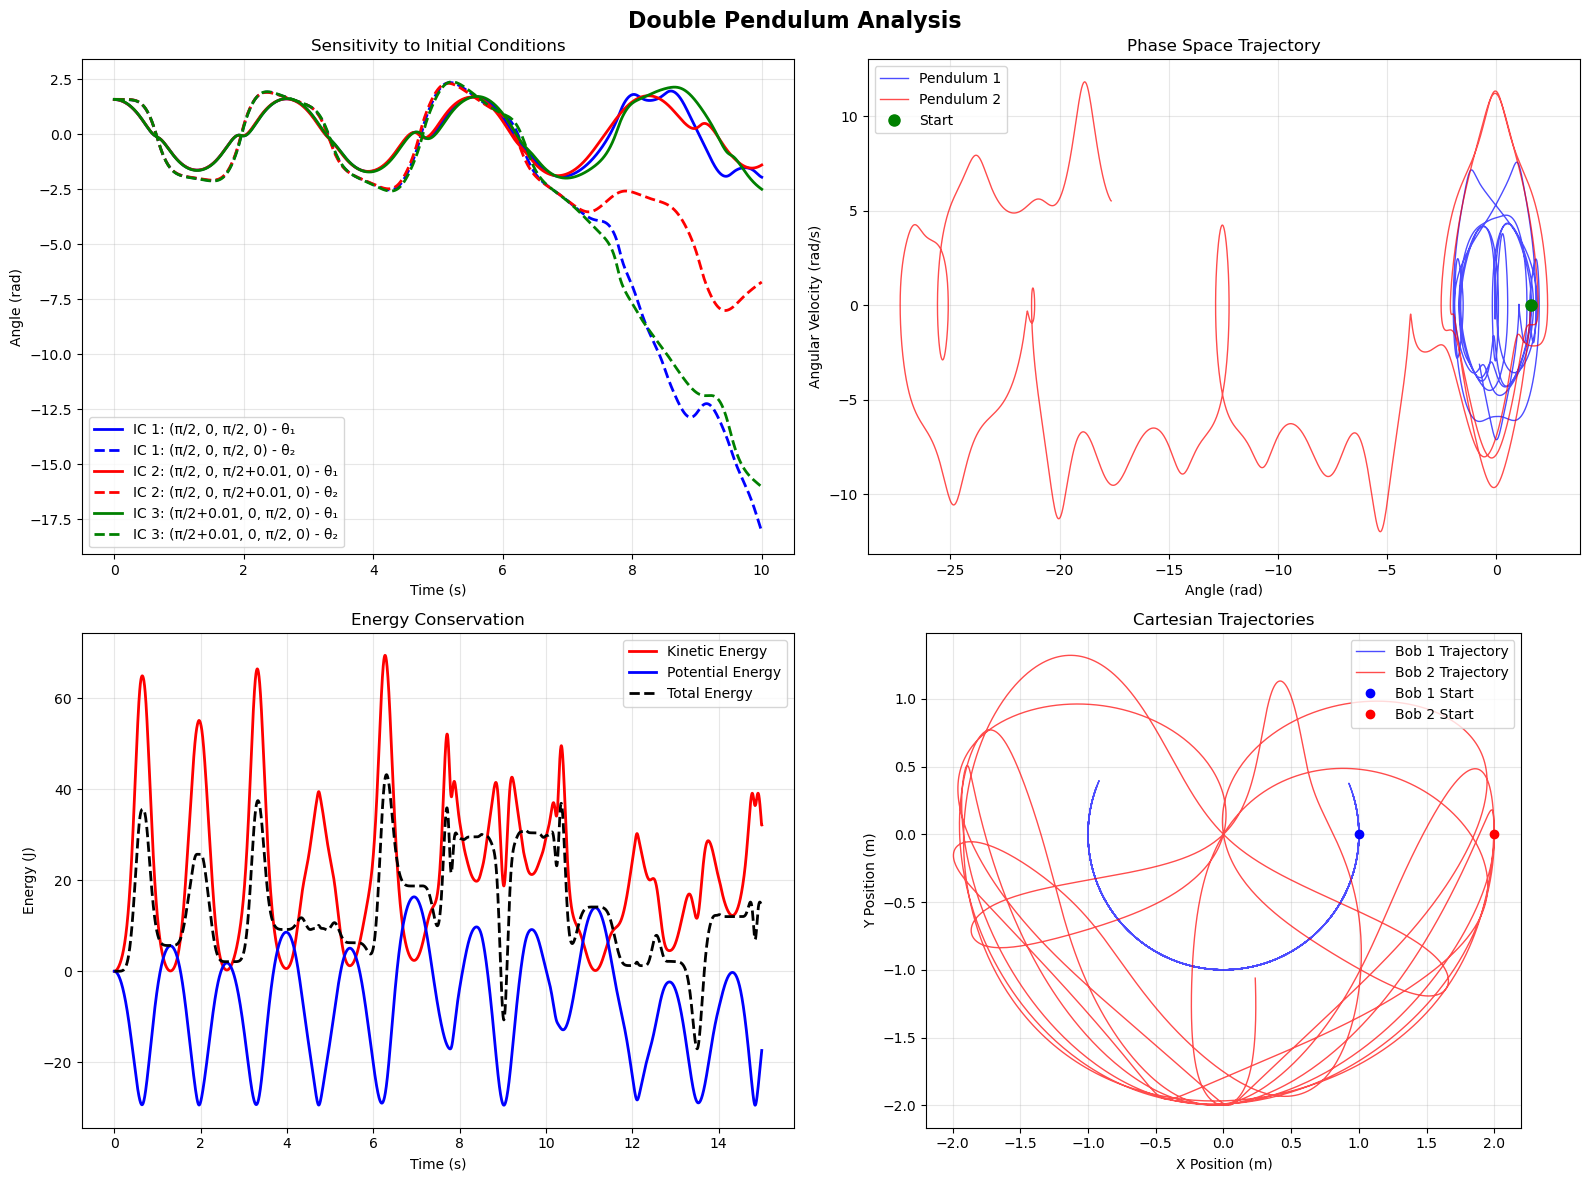


5. Creating Animated Double Pendulum...


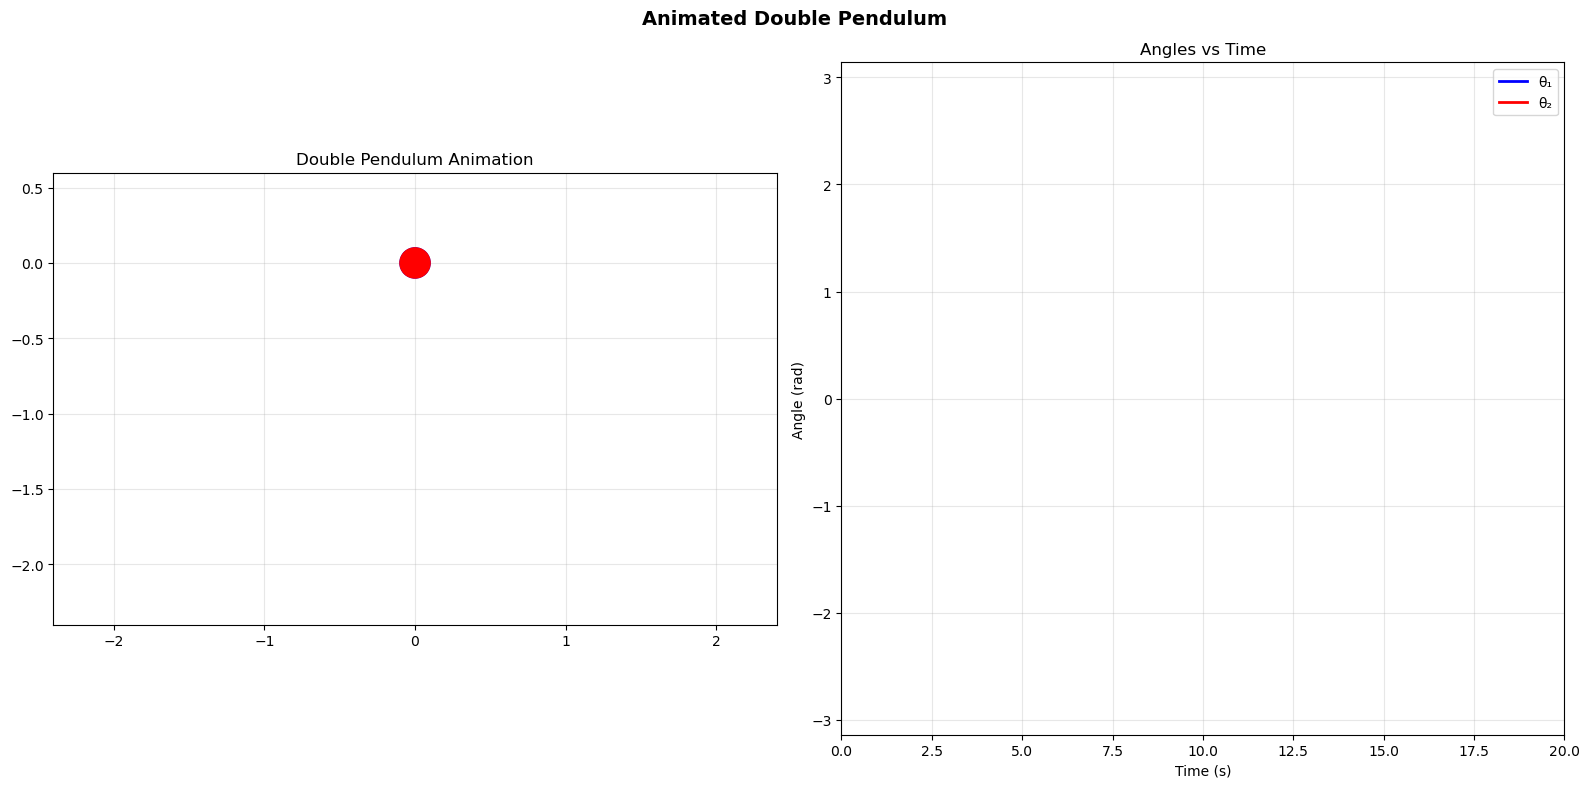


6. Chaos Analysis...


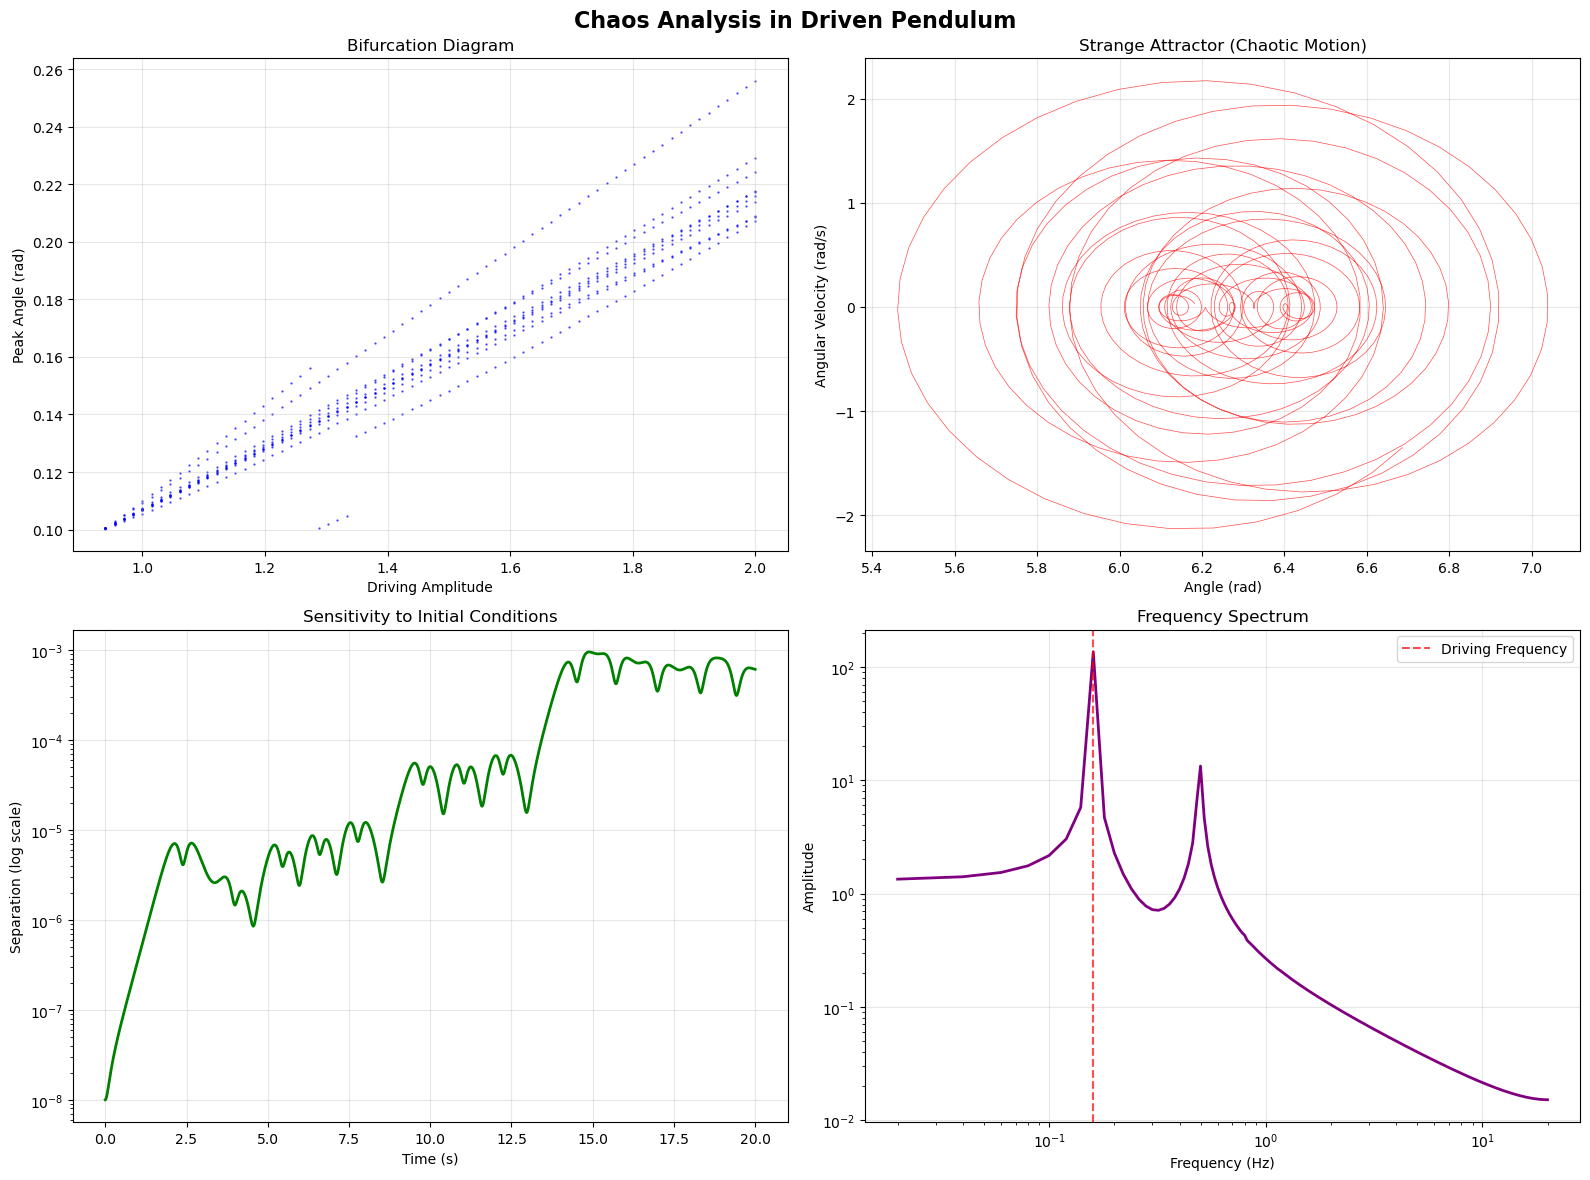


7. Interactive Demo...


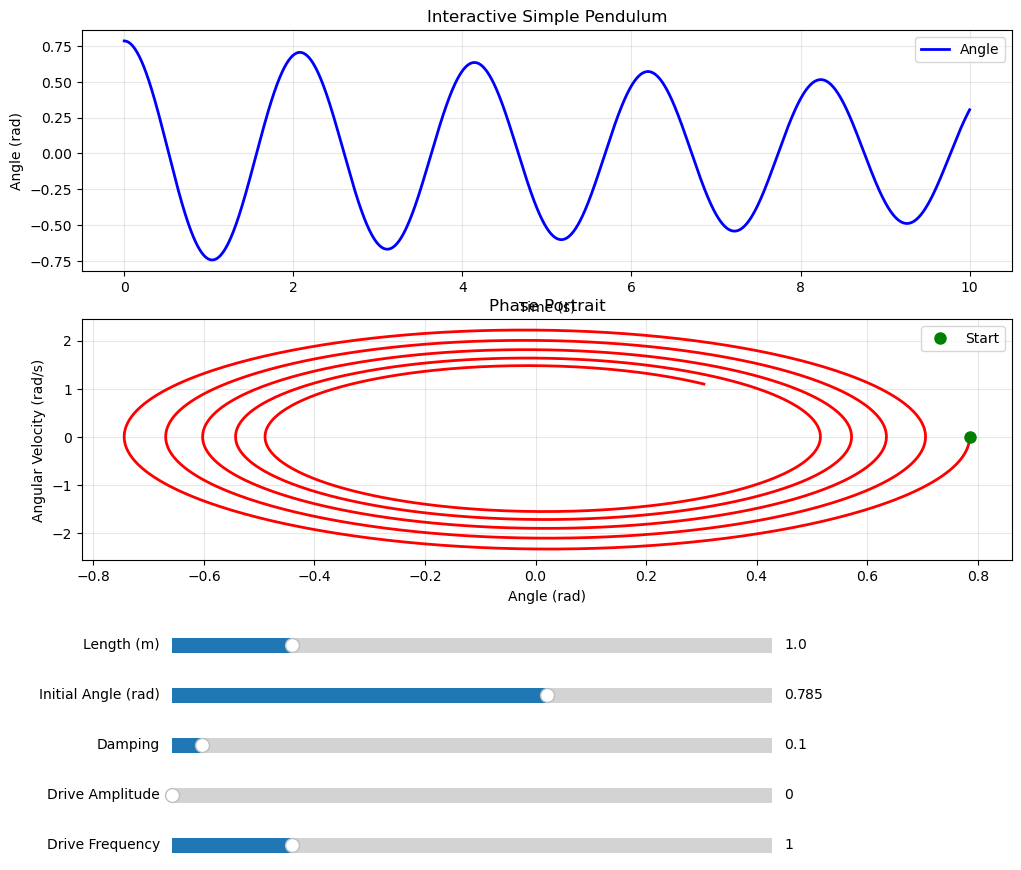


Demo completed! All visualizations should be displayed.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.integrate import odeint
from matplotlib.widgets import Slider, Button
import warnings
warnings.filterwarnings('ignore')

class PendulumSystem:
    """
    A comprehensive pendulum system simulator with visualization capabilities.
    Supports simple and double pendulum systems with damping and driving forces.
    """
    
    def __init__(self):
        self.fig = None
        self.ax = None
        self.animation = None
        self.is_playing = False
        self.g = 9.81  # Gravitational acceleration
        
    def simple_pendulum_dynamics(self, state, t, L, g, b, A=0, omega_d=0):
        """
        Differential equation for simple pendulum with damping and optional driving force
        state = [theta, omega] where omega = dtheta/dt
        """
        theta, omega = state
        
        # Driving force (optional)
        driving_torque = A * np.cos(omega_d * t) if A > 0 else 0
        
        # Equation of motion: d²θ/dt² = -(g/L)sin(θ) - b*dθ/dt + driving_torque
        dtheta_dt = omega
        domega_dt = -(g/L) * np.sin(theta) - b * omega + driving_torque
        
        return [dtheta_dt, domega_dt]
    
    def double_pendulum_dynamics(self, state, t, m1, m2, L1, L2, g, b1=0, b2=0):
        """
        Differential equations for double pendulum with damping
        state = [theta1, omega1, theta2, omega2]
        """
        theta1, omega1, theta2, omega2 = state
        
        # Shorthand variables
        delta = theta2 - theta1
        den1 = (m1 + m2) * L1 - m2 * L1 * np.cos(delta) * np.cos(delta)
        den2 = (L2 / L1) * den1
        
        # First pendulum
        num1 = (-m2 * L1 * omega1**2 * np.sin(delta) * np.cos(delta) +
                m2 * g * np.sin(theta2) * np.cos(delta) +
                m2 * L2 * omega2**2 * np.sin(delta) -
                (m1 + m2) * g * np.sin(theta1) -
                b1 * omega1)
        
        domega1_dt = num1 / den1
        
        # Second pendulum
        num2 = (-m2 * L2 * omega2**2 * np.sin(delta) * np.cos(delta) +
                (m1 + m2) * g * np.sin(theta1) * np.cos(delta) -
                (m1 + m2) * L1 * omega1**2 * np.sin(delta) -
                (m1 + m2) * g * np.sin(theta2) -
                b2 * omega2)
        
        domega2_dt = num2 / den2
        
        return [omega1, domega1_dt, omega2, domega2_dt]
    
    def simulate_simple_pendulum(self, L=1.0, theta0=np.pi/4, omega0=0.0, 
                                b=0.0, A=0.0, omega_d=0.0, t_max=10.0):
        """
        Simulate simple pendulum motion
        """
        t = np.linspace(0, t_max, 2000)
        initial_state = [theta0, omega0]
        
        solution = odeint(self.simple_pendulum_dynamics, initial_state, t, 
                         args=(L, self.g, b, A, omega_d))
        
        return t, solution[:, 0], solution[:, 1]  # time, theta, omega
    
    def simulate_double_pendulum(self, m1=1.0, m2=1.0, L1=1.0, L2=1.0,
                               theta1_0=np.pi/2, theta2_0=np.pi/2,
                               omega1_0=0.0, omega2_0=0.0, b1=0.0, b2=0.0, t_max=20.0):
        """
        Simulate double pendulum motion
        """
        t = np.linspace(0, t_max, 4000)
        initial_state = [theta1_0, omega1_0, theta2_0, omega2_0]
        
        solution = odeint(self.double_pendulum_dynamics, initial_state, t,
                         args=(m1, m2, L1, L2, self.g, b1, b2))
        
        return t, solution[:, 0], solution[:, 2]  # time, theta1, theta2
    
    def plot_simple_pendulum_analysis(self):
        """
        Create comprehensive analysis plots for simple pendulum
        """
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('Simple Pendulum Analysis', fontsize=16, fontweight='bold')
        
        # 1. Different initial amplitudes
        amplitudes = [np.pi/6, np.pi/4, np.pi/3, np.pi/2, 3*np.pi/4]
        colors = ['blue', 'green', 'orange', 'red', 'purple']
        
        for amp, color in zip(amplitudes, colors):
            t, theta, omega = self.simulate_simple_pendulum(theta0=amp, t_max=8)
            ax1.plot(t, theta, label=f'θ₀ = {amp:.2f} rad ({amp*180/np.pi:.0f}°)', 
                    color=color, linewidth=2)
        
        ax1.set_xlabel('Time (s)')
        ax1.set_ylabel('Angle (rad)')
        ax1.set_title('Angle vs Time (Different Initial Amplitudes)')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # 2. Phase portrait for different amplitudes
        for amp, color in zip(amplitudes, colors):
            t, theta, omega = self.simulate_simple_pendulum(theta0=amp, t_max=8)
            ax2.plot(theta, omega, color=color, linewidth=2, alpha=0.8)
            ax2.plot(theta[0], omega[0], 'o', color=color, markersize=6)
        
        ax2.set_xlabel('Angle (rad)')
        ax2.set_ylabel('Angular Velocity (rad/s)')
        ax2.set_title('Phase Portrait (Different Amplitudes)')
        ax2.grid(True, alpha=0.3)
        
        # 3. Damping effects
        damping_cases = [
            (0.0, 'No Damping', 'blue'),
            (0.1, 'Light Damping', 'green'),
            (0.5, 'Medium Damping', 'orange'),
            (1.0, 'Heavy Damping', 'red')
        ]
        
        for b, label, color in damping_cases:
            t, theta, omega = self.simulate_simple_pendulum(b=b, theta0=np.pi/4, t_max=15)
            ax3.plot(t, theta, label=label, color=color, linewidth=2)
        
        ax3.set_xlabel('Time (s)')
        ax3.set_ylabel('Angle (rad)')
        ax3.set_title('Effect of Damping')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        
        # 4. Energy analysis
        t, theta, omega = self.simulate_simple_pendulum(b=0.05, theta0=np.pi/3, t_max=12)
        L = 1.0
        m = 1.0  # Assume unit mass
        
        # Calculate energies
        kinetic_energy = 0.5 * m * (L * omega)**2
        potential_energy = m * self.g * L * (1 - np.cos(theta))
        total_energy = kinetic_energy + potential_energy
        
        ax4.plot(t, kinetic_energy, label='Kinetic Energy', color='red', linewidth=2)
        ax4.plot(t, potential_energy, label='Potential Energy', color='blue', linewidth=2)
        ax4.plot(t, total_energy, label='Total Energy', color='black', 
                linewidth=2, linestyle='--')
        
        ax4.set_xlabel('Time (s)')
        ax4.set_ylabel('Energy (J)')
        ax4.set_title('Energy vs Time (Light Damping)')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    def plot_driven_pendulum_analysis(self):
        """
        Analyze driven pendulum showing resonance and chaos
        """
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('Driven Pendulum Analysis', fontsize=16, fontweight='bold')
        
        # Natural frequency for small oscillations
        L = 1.0
        omega_0 = np.sqrt(self.g / L)
        
        # 1. Resonance - different driving frequencies
        driving_freqs = [0.5*omega_0, 0.8*omega_0, omega_0, 1.2*omega_0, 1.5*omega_0]
        colors = ['blue', 'green', 'red', 'orange', 'purple']
        
        for omega_d, color in zip(driving_freqs, colors):
            t, theta, omega = self.simulate_simple_pendulum(
                b=0.1, A=0.5, omega_d=omega_d, theta0=0.1, t_max=20
            )
            ax1.plot(t[1000:], theta[1000:], label=f'ω_d = {omega_d/omega_0:.1f}ω₀', 
                    color=color, linewidth=2)
        
        ax1.set_xlabel('Time (s)')
        ax1.set_ylabel('Angle (rad)')
        ax1.set_title('Resonance Response (Different Driving Frequencies)')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # 2. Phase portrait of driven pendulum
        t, theta, omega = self.simulate_simple_pendulum(
            b=0.1, A=1.0, omega_d=omega_0, theta0=0.1, t_max=30
        )
        ax2.plot(theta, omega, color='red', linewidth=1, alpha=0.7)
        ax2.set_xlabel('Angle (rad)')
        ax2.set_ylabel('Angular Velocity (rad/s)')
        ax2.set_title('Phase Portrait (Driven at Resonance)')
        ax2.grid(True, alpha=0.3)
        
        # 3. Amplitude vs driving frequency (resonance curve)
        drive_freqs = np.linspace(0.1, 3.0, 50) * omega_0
        steady_state_amps = []
        
        for omega_d in drive_freqs:
            t, theta, omega = self.simulate_simple_pendulum(
                b=0.2, A=0.3, omega_d=omega_d, theta0=0.0, t_max=25
            )
            # Take amplitude from last part of simulation (steady state)
            steady_state_amps.append(np.max(np.abs(theta[-500:])))
        
        ax3.plot(drive_freqs/omega_0, steady_state_amps, 'b-', linewidth=2)
        ax3.axvline(x=1, color='red', linestyle='--', alpha=0.7, label='Natural Frequency')
        ax3.set_xlabel('Driving Frequency (ω_d/ω₀)')
        ax3.set_ylabel('Steady State Amplitude (rad)')
        ax3.set_title('Resonance Curve')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        
        # 4. Chaotic motion (high amplitude driving)
        t, theta, omega = self.simulate_simple_pendulum(
            b=0.1, A=1.5, omega_d=2.0/3.0, theta0=3.0, t_max=50
        )
        
        # Poincaré section (sample at driving frequency)
        T_drive = 2*np.pi/(2.0/3.0)  # Driving period
        poincare_indices = []
        for i, time in enumerate(t):
            if abs(time % T_drive) < 0.01:  # Sample near multiples of driving period
                poincare_indices.append(i)
        
        poincare_theta = theta[poincare_indices]
        poincare_omega = omega[poincare_indices]
        
        ax4.scatter(poincare_theta, poincare_omega, s=1, c='red', alpha=0.6)
        ax4.set_xlabel('Angle (rad)')
        ax4.set_ylabel('Angular Velocity (rad/s)')
        ax4.set_title('Poincaré Section (Chaotic Motion)')
        ax4.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    def create_animated_simple_pendulum(self, L=1.0, theta0=np.pi/4, b=0.0):
        """
        Create animated visualization of simple pendulum
        """
        # Simulate the system
        t, theta, omega = self.simulate_simple_pendulum(L=L, theta0=theta0, b=b, t_max=15)
        
        # Set up the figure
        self.fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
        self.fig.suptitle('Animated Simple Pendulum', fontsize=14, fontweight='bold')
        
        # Animation axis (left)
        ax1.set_xlim(-1.5*L, 1.5*L)
        ax1.set_ylim(-1.5*L, 0.5*L)
        ax1.set_aspect('equal')
        ax1.set_title('Pendulum Animation')
        ax1.grid(True, alpha=0.3)
        
        # Plot axis (right)
        ax2.set_xlim(0, 15)
        ax2.set_ylim(min(theta)*1.1, max(theta)*1.1)
        ax2.set_xlabel('Time (s)')
        ax2.set_ylabel('Angle (rad)')
        ax2.set_title('Angle vs Time')
        ax2.grid(True, alpha=0.3)
        
        # Initialize animated objects
        # Pendulum rod
        rod_line, = ax1.plot([], [], 'k-', linewidth=3)
        
        # Pendulum bob
        bob_circle = plt.Circle((0, 0), 0.05*L, color='red', zorder=5)
        ax1.add_patch(bob_circle)
        
        # Pivot point
        ax1.plot(0, 0, 'ko', markersize=8)
        
        # Angle trace
        line, = ax2.plot([], [], 'b-', linewidth=2)
        time_marker, = ax2.plot([], [], 'ro', markersize=6)
        
        # Trajectory trace (optional)
        trail_x, trail_y = [], []
        trail_line, = ax1.plot([], [], 'r-', alpha=0.3, linewidth=1)
        
        def animate(frame):
            # Current angle
            current_theta = theta[frame]
            
            # Calculate bob position
            x_bob = L * np.sin(current_theta)
            y_bob = -L * np.cos(current_theta)
            
            # Update rod
            rod_line.set_data([0, x_bob], [0, y_bob])
            
            # Update bob
            bob_circle.center = (x_bob, y_bob)
            
            # Update trail
            trail_x.append(x_bob)
            trail_y.append(y_bob)
            if len(trail_x) > 100:  # Keep last 100 points
                trail_x.pop(0)
                trail_y.pop(0)
            trail_line.set_data(trail_x, trail_y)
            
            # Update angle plot
            line.set_data(t[:frame], theta[:frame])
            time_marker.set_data([t[frame]], [theta[frame]])
            
            return rod_line, bob_circle, line, time_marker, trail_line
        
        # Create animation
        self.animation = animation.FuncAnimation(
            self.fig, animate, frames=len(t), interval=10, blit=False, repeat=True
        )
        
        plt.tight_layout()
        plt.show()
        
        return self.animation
    
    def plot_double_pendulum_analysis(self):
        """
        Create analysis plots for double pendulum
        """
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('Double Pendulum Analysis', fontsize=16, fontweight='bold')
        
        # 1. Different initial conditions showing sensitivity
        initial_conditions = [
            ([np.pi/2, 0, np.pi/2, 0], 'IC 1: (π/2, 0, π/2, 0)', 'blue'),
            ([np.pi/2, 0, np.pi/2 + 0.01, 0], 'IC 2: (π/2, 0, π/2+0.01, 0)', 'red'),
            ([np.pi/2 + 0.01, 0, np.pi/2, 0], 'IC 3: (π/2+0.01, 0, π/2, 0)', 'green')
        ]
        
        for ic, label, color in initial_conditions:
            t, theta1, theta2 = self.simulate_double_pendulum(
                theta1_0=ic[0], omega1_0=ic[1], theta2_0=ic[2], omega2_0=ic[3], t_max=10
            )
            ax1.plot(t, theta1, color=color, linewidth=2, label=f'{label} - θ₁')
            ax1.plot(t, theta2, color=color, linewidth=2, linestyle='--', label=f'{label} - θ₂')
        
        ax1.set_xlabel('Time (s)')
        ax1.set_ylabel('Angle (rad)')
        ax1.set_title('Sensitivity to Initial Conditions')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # 2. Phase space trajectory
        t, theta1, theta2 = self.simulate_double_pendulum(t_max=15)
        dt = t[1] - t[0]
        omega1 = np.gradient(theta1, dt)
        omega2 = np.gradient(theta2, dt)
        
        ax2.plot(theta1, omega1, 'b-', linewidth=1, alpha=0.7, label='Pendulum 1')
        ax2.plot(theta2, omega2, 'r-', linewidth=1, alpha=0.7, label='Pendulum 2')
        ax2.plot(theta1[0], omega1[0], 'go', markersize=8, label='Start')
        
        ax2.set_xlabel('Angle (rad)')
        ax2.set_ylabel('Angular Velocity (rad/s)')
        ax2.set_title('Phase Space Trajectory')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # 3. Energy analysis
        m1, m2, L1, L2 = 1.0, 1.0, 1.0, 1.0
        
        # Kinetic energy
        T1 = 0.5 * m1 * (L1 * omega1)**2
        T2 = 0.5 * m2 * ((L1 * omega1)**2 + (L2 * omega2)**2 + 
                         2 * L1 * L2 * omega1 * omega2 * np.cos(theta1 - theta2))
        kinetic_energy = T1 + T2
        
        # Potential energy
        V1 = -m1 * self.g * L1 * np.cos(theta1)
        V2 = -m2 * self.g * (L1 * np.cos(theta1) + L2 * np.cos(theta2))
        potential_energy = V1 + V2
        
        total_energy = kinetic_energy + potential_energy
        
        ax3.plot(t, kinetic_energy, label='Kinetic Energy', color='red', linewidth=2)
        ax3.plot(t, potential_energy, label='Potential Energy', color='blue', linewidth=2)
        ax3.plot(t, total_energy, label='Total Energy', color='black', 
                linewidth=2, linestyle='--')
        
        ax3.set_xlabel('Time (s)')
        ax3.set_ylabel('Energy (J)')
        ax3.set_title('Energy Conservation')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        
        # 4. Trajectory in Cartesian space
        x1 = L1 * np.sin(theta1)
        y1 = -L1 * np.cos(theta1)
        x2 = x1 + L2 * np.sin(theta2)
        y2 = y1 - L2 * np.cos(theta2)
        
        ax4.plot(x1, y1, 'b-', linewidth=1, alpha=0.7, label='Bob 1 Trajectory')
        ax4.plot(x2, y2, 'r-', linewidth=1, alpha=0.7, label='Bob 2 Trajectory')
        ax4.plot(x1[0], y1[0], 'bo', markersize=6, label='Bob 1 Start')
        ax4.plot(x2[0], y2[0], 'ro', markersize=6, label='Bob 2 Start')
        
        ax4.set_xlabel('X Position (m)')
        ax4.set_ylabel('Y Position (m)')
        ax4.set_title('Cartesian Trajectories')
        ax4.set_aspect('equal')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    def create_animated_double_pendulum(self, m1=1.0, m2=1.0, L1=1.0, L2=1.0,
                                      theta1_0=np.pi/2, theta2_0=np.pi/2):
        """
        Create animated visualization of double pendulum
        """
        # Simulate the system
        t, theta1, theta2 = self.simulate_double_pendulum(
            m1=m1, m2=m2, L1=L1, L2=L2, 
            theta1_0=theta1_0, theta2_0=theta2_0, t_max=20
        )
        
        # Set up the figure
        self.fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
        self.fig.suptitle('Animated Double Pendulum', fontsize=14, fontweight='bold')
        
        # Animation axis (left)
        total_length = L1 + L2
        ax1.set_xlim(-total_length*1.2, total_length*1.2)
        ax1.set_ylim(-total_length*1.2, total_length*0.3)
        ax1.set_aspect('equal')
        ax1.set_title('Double Pendulum Animation')
        ax1.grid(True, alpha=0.3)
        
        # Plot axis (right)
        ax2.set_xlim(0, 20)
        ax2.set_ylim(-np.pi, np.pi)
        ax2.set_xlabel('Time (s)')
        ax2.set_ylabel('Angle (rad)')
        ax2.set_title('Angles vs Time')
        ax2.grid(True, alpha=0.3)
        
        # Initialize animated objects
        # Pendulum rods
        rod1_line, = ax1.plot([], [], 'k-', linewidth=4, label='Rod 1')
        rod2_line, = ax1.plot([], [], 'k-', linewidth=4, label='Rod 2')
        
        # Pendulum bobs
        bob1_circle = plt.Circle((0, 0), 0.05*total_length, color='blue', zorder=5)
        bob2_circle = plt.Circle((0, 0), 0.05*total_length, color='red', zorder=5)
        ax1.add_patch(bob1_circle)
        ax1.add_patch(bob2_circle)
        
        # Pivot point
        ax1.plot(0, 0, 'ko', markersize=10)
        
        # Angle traces
        line1, = ax2.plot([], [], 'b-', linewidth=2, label='θ₁')
        line2, = ax2.plot([], [], 'r-', linewidth=2, label='θ₂')
        time_marker1, = ax2.plot([], [], 'bo', markersize=6)
        time_marker2, = ax2.plot([], [], 'ro', markersize=6)
        
        # Trajectory traces
        trail1_x, trail1_y = [], []
        trail2_x, trail2_y = [], []
        trail1_line, = ax1.plot([], [], 'b-', alpha=0.3, linewidth=1, label='Bob 1 Trail')
        trail2_line, = ax1.plot([], [], 'r-', alpha=0.3, linewidth=1, label='Bob 2 Trail')
        
        ax2.legend()
        
        def animate(frame):
            # Current angles
            th1, th2 = theta1[frame], theta2[frame]
            
            # Calculate positions
            x1 = L1 * np.sin(th1)
            y1 = -L1 * np.cos(th1)
            x2 = x1 + L2 * np.sin(th2)
            y2 = y1 - L2 * np.cos(th2)
            
            # Update rods
            rod1_line.set_data([0, x1], [0, y1])
            rod2_line.set_data([x1, x2], [y1, y2])
            
            # Update bobs
            bob1_circle.center = (x1, y1)
            bob2_circle.center = (x2, y2)
            
            # Update trails
            trail1_x.append(x1)
            trail1_y.append(y1)
            trail2_x.append(x2)
            trail2_y.append(y2)
            
            if len(trail1_x) > 200:  # Keep last 200 points
                trail1_x.pop(0)
                trail1_y.pop(0)
                trail2_x.pop(0)
                trail2_y.pop(0)
            
            trail1_line.set_data(trail1_x, trail1_y)
            trail2_line.set_data(trail2_x, trail2_y)
            
            # Update angle plots
            line1.set_data(t[:frame], theta1[:frame])
            line2.set_data(t[:frame], theta2[:frame])
            time_marker1.set_data([t[frame]], [theta1[frame]])
            time_marker2.set_data([t[frame]], [theta2[frame]])
            
            return (rod1_line, rod2_line, bob1_circle, bob2_circle, 
                   line1, line2, time_marker1, time_marker2, 
                   trail1_line, trail2_line)
        
        # Create animation
        self.animation = animation.FuncAnimation(
            self.fig, animate, frames=len(t), interval=8, blit=False, repeat=True
        )
        
        plt.tight_layout()
        plt.show()
        
        return self.animation
    
    def interactive_pendulum_demo(self):
        """
        Create interactive demo with sliders for simple pendulum
        """
        # Initial parameters
        L_init, theta0_init, b_init = 1.0, np.pi/4, 0.1
        
        # Set up the figure
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
        plt.subplots_adjust(bottom=0.35)
        
        # Initial simulation
        t, theta, omega = self.simulate_simple_pendulum(L=L_init, theta0=theta0_init, b=b_init)
        
        # Plot initial data
        line1, = ax1.plot(t, theta, 'b-', linewidth=2, label='Angle')
        ax1.set_xlabel('Time (s)')
        ax1.set_ylabel('Angle (rad)')
        ax1.set_title('Interactive Simple Pendulum')
        ax1.grid(True, alpha=0.3)
        ax1.legend()
        
        line2, = ax2.plot(theta, omega, 'r-', linewidth=2)
        ax2.plot(theta[0], omega[0], 'go', markersize=8, label='Start')
        ax2.set_xlabel('Angle (rad)')
        ax2.set_ylabel('Angular Velocity (rad/s)')
        ax2.set_title('Phase Portrait')
        ax2.grid(True, alpha=0.3)
        ax2.legend()
        
        # Create sliders
        ax_L = plt.axes([0.2, 0.25, 0.5, 0.03])
        ax_theta0 = plt.axes([0.2, 0.20, 0.5, 0.03])
        ax_b = plt.axes([0.2, 0.15, 0.5, 0.03])
        ax_A = plt.axes([0.2, 0.10, 0.5, 0.03])
        ax_omega_d = plt.axes([0.2, 0.05, 0.5, 0.03])
        
        slider_L = Slider(ax_L, 'Length (m)', 0.5, 3.0, valinit=L_init)
        slider_theta0 = Slider(ax_theta0, 'Initial Angle (rad)', -np.pi, np.pi, valinit=theta0_init)
        slider_b = Slider(ax_b, 'Damping', 0.0, 2.0, valinit=b_init)
        slider_A = Slider(ax_A, 'Drive Amplitude', 0.0, 2.0, valinit=0.0)
        slider_omega_d = Slider(ax_omega_d, 'Drive Frequency', 0.0, 5.0, valinit=1.0)
        
        def update(val):
            L = slider_L.val
            theta0 = slider_theta0.val
            b = slider_b.val
            A = slider_A.val
            omega_d = slider_omega_d.val
            
            # Recalculate
            t, theta, omega = self.simulate_simple_pendulum(
                L=L, theta0=theta0, b=b, A=A, omega_d=omega_d, t_max=15
            )
            
            # Update plots
            line1.set_data(t, theta)
            ax1.relim()
            ax1.autoscale_view()
            
            line2.set_data(theta, omega)
            ax2.relim()  
            ax2.autoscale_view()
            
            fig.canvas.draw()
        
        # Connect sliders to update function
        slider_L.on_changed(update)
        slider_theta0.on_changed(update)
        slider_b.on_changed(update)
        slider_A.on_changed(update)
        slider_omega_d.on_changed(update)
        
        plt.show()
    
    def chaos_analysis(self):
        """
        Analyze chaotic behavior in driven pendulum
        """
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('Chaos Analysis in Driven Pendulum', fontsize=16, fontweight='bold')
        
        # 1. Bifurcation diagram
        drive_amplitudes = np.linspace(0.5, 2.0, 100)
        omega_d = 2.0/3.0  # Fixed driving frequency
        b = 0.1  # Light damping
        
        steady_state_values = []
        for A in drive_amplitudes:
            t, theta, omega = self.simulate_simple_pendulum(
                b=b, A=A, omega_d=omega_d, theta0=0.1, t_max=100
            )
            # Take last 50 periods and find local maxima
            T_drive = 2*np.pi/omega_d
            n_periods = 50
            start_idx = len(t) - int(n_periods * T_drive / (t[1] - t[0]))
            
            # Find local maxima in the last part
            from scipy.signal import find_peaks
            peaks, _ = find_peaks(theta[start_idx:], height=0.1)
            if len(peaks) > 0:
                peak_values = theta[start_idx:][peaks]
                steady_state_values.extend([(A, val) for val in peak_values[-10:]])  # Last 10 peaks
        
        if steady_state_values:
            A_vals, theta_vals = zip(*steady_state_values)
            ax1.scatter(A_vals, theta_vals, s=0.5, alpha=0.6, color='blue')
        
        ax1.set_xlabel('Driving Amplitude')
        ax1.set_ylabel('Peak Angle (rad)')
        ax1.set_title('Bifurcation Diagram')
        ax1.grid(True, alpha=0.3)
        
        # 2. Strange attractor in phase space
        t, theta, omega = self.simulate_simple_pendulum(
            b=0.1, A=1.5, omega_d=2.0/3.0, theta0=3.0, t_max=100
        )
        
        # Skip transient
        skip = len(t) // 3
        ax2.plot(theta[skip:], omega[skip:], 'r-', linewidth=0.5, alpha=0.7)
        ax2.set_xlabel('Angle (rad)')
        ax2.set_ylabel('Angular Velocity (rad/s)')
        ax2.set_title('Strange Attractor (Chaotic Motion)')
        ax2.grid(True, alpha=0.3)
        
        # 3. Lyapunov exponent calculation (simplified)
        # Compare two nearly identical initial conditions
        delta = 1e-8  # Small perturbation
        
        t, theta1, omega1 = self.simulate_simple_pendulum(
            b=0.1, A=1.5, omega_d=2.0/3.0, theta0=3.0, t_max=20
        )
        t, theta2, omega2 = self.simulate_simple_pendulum(
            b=0.1, A=1.5, omega_d=2.0/3.0, theta0=3.0 + delta, t_max=20
        )
        
        # Calculate separation
        separation = np.sqrt((theta1 - theta2)**2 + (omega1 - omega2)**2)
        log_separation = np.log(separation / delta)
        
        ax3.semilogy(t, separation, 'g-', linewidth=2)
        ax3.set_xlabel('Time (s)')
        ax3.set_ylabel('Separation (log scale)')
        ax3.set_title('Sensitivity to Initial Conditions')
        ax3.grid(True, alpha=0.3)
        
        # 4. Frequency spectrum
        from scipy.fft import fft, fftfreq
        
        t, theta, omega = self.simulate_simple_pendulum(
            b=0.1, A=1.2, omega_d=1.0, theta0=0.1, t_max=50
        )
        
        dt = t[1] - t[0]
        fft_theta = np.abs(fft(theta))
        freqs = fftfreq(len(t), dt)
        
        # Only positive frequencies
        pos_mask = freqs > 0
        freqs_pos = freqs[pos_mask]
        fft_pos = fft_theta[pos_mask]
        
        ax4.loglog(freqs_pos, fft_pos, 'purple', linewidth=2)
        ax4.axvline(1.0/(2*np.pi), color='red', linestyle='--', alpha=0.7, label='Driving Frequency')
        ax4.set_xlabel('Frequency (Hz)')
        ax4.set_ylabel('Amplitude')
        ax4.set_title('Frequency Spectrum')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

# Create an instance and run demonstrations
def main():
    """
    Main function to run all demonstrations
    """
    ps = PendulumSystem()
    
    print("Pendulum Motion Visualization Demo")
    print("==================================")
    print("\n1. Simple Pendulum Analysis...")
    ps.plot_simple_pendulum_analysis()
    
    print("\n2. Driven Pendulum Analysis...")
    ps.plot_driven_pendulum_analysis()
    
    print("\n3. Creating Animated Simple Pendulum...")
    anim1 = ps.create_animated_simple_pendulum()
    
    print("\n4. Double Pendulum Analysis...")
    ps.plot_double_pendulum_analysis()
    
    print("\n5. Creating Animated Double Pendulum...")
    anim2 = ps.create_animated_double_pendulum()
    
    print("\n6. Chaos Analysis...")
    ps.chaos_analysis()
    
    print("\n7. Interactive Demo...")
    ps.interactive_pendulum_demo()
    
    print("\nDemo completed! All visualizations should be displayed.")

if __name__ == "__main__":
    main()